In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define a 5x5 input image representing the letter "T"
input_image = np.array([
    [1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 1, 0, 1, 1, 1]
])

In [12]:
# Define two edge detection filters
# Filter 1 detects vertical edges, and Filter 2 detects horizontal edges.
filter_1 = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

filter_2 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

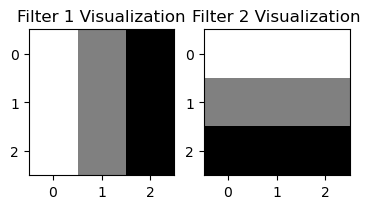

In [13]:
plt.subplot(2, 3, 1)
plt.imshow(filter_1, cmap='gray')
plt.title("Filter 1 Visualization")


plt.subplot(2, 3, 2)
plt.imshow(filter_2, cmap='gray')
plt.title("Filter 2 Visualization")
plt.show()

In [14]:
# Function to apply a filter to the input image
def apply_filter(image, filter):
    # Get the size of the filter (assumed square) and calculate output size
    filter_size = filter.shape[0]
    output_size = image.shape[0] - filter_size + 1
    
    # Initialize an empty feature map to store convolution results
    feature_map = np.zeros((output_size, output_size))
    
    # Slide the filter across the image
    for i in range(output_size):
        for j in range(output_size):
            # Extract the current region of interest from the image
            region = image[i:i+filter_size, j:j+filter_size]
            # Perform element-wise multiplication and sum the results
            feature_map[i, j] = np.sum(region * filter)
    
    return feature_map

In [19]:
# Apply both filters to the input image to get feature maps
feature_map_1 = apply_filter(input_image, filter_1)
feature_map_2 = apply_filter(input_image, filter_2)

print(f"map 1 \n{feature_map_1}  \n")

print(feature_map_2)

map 1 
[[ 1.  0. -1. -1.]
 [ 2.  0. -2. -1.]
 [ 3.  0. -3.  0.]
 [ 3.  0. -3.  0.]]  

[[ 1.  1.  1.  0.]
 [-2. -2. -2. -2.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [ ]:
# Define the hard swish activation function
def hard_swish(x):
    # Hard swish introduces non-linearity by scaling inputs based on their value
    return x * np.minimum(np.maximum(x + 3, 0), 6) / 6

In [ ]:
# Apply the activation function to both feature maps
activated_feature_map_1 = hard_swish(feature_map_1)
activated_feature_map_2 = hard_swish(feature_map_2)

In [ ]:
threshold = 0.5
# Simplified classification using a threshold
def classify(feature_maps, threshold=threshold):
    total_activation = np.sum(feature_maps)
    print(f"total_activation: {total_activation}")
    
    if total_activation > threshold:
        return "Edge"
    else:
        return "No Edge"

In [ ]:
# Combine activated feature maps and classify
combined_feature_maps = activated_feature_map_1 + activated_feature_map_2
classification_result = classify(combined_feature_maps)

classification_result

total_activation: 7.666666666666668


'Edge'

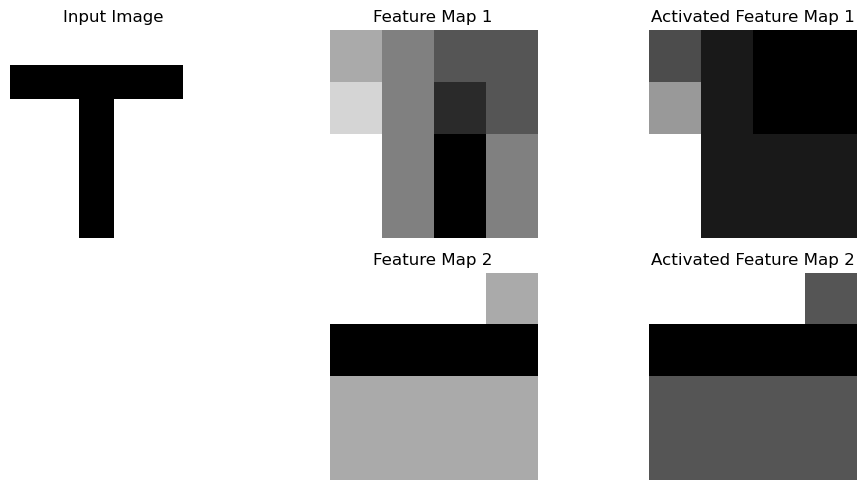

In [ ]:
# Plot the results for visualization
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.title("Input Image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Feature Map 1")
plt.imshow(feature_map_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Activated Feature Map 1")
plt.imshow(activated_feature_map_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Feature Map 2")
plt.imshow(feature_map_2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Activated Feature Map 2")
plt.imshow(activated_feature_map_2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()